# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys

# Import API key
from weatherapikey import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

In [3]:
# list of cities to query
#cities_10 = cities[0:9]
#print(cities_10)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#Build query url and request your results in JSON
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#List to hold values
citynames=[]
cloudinesss=[]
countrys=[]
dates=[]
humiditys=[]
lats=[]
lons=[]
maxtemps=[]
windspeeds=[]

print(f'Beginning Data Retrieval')
print(f'---------------------------------------------------------')

for num, city in enumerate(cities):
    print("Processing record number {}: {}".format(num,city))
    try:
        # Build query URL and request your results in Fahrenheit
        query_url = f"{url}appid={api_key_weather}&q={city}&units={units}"
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(query_url)
        
        # Get data from JSON response
        cityname = weather_json["name"]
        citynames.append(cityname)
        cloudiness = weather_json["clouds"]["all"]
        cloudinesss.append(cloudiness)
        country = weather_json["sys"]["country"]
        countrys.append(country)
        date = weather_json["dt"]
        dates.append(date)
        humidity = weather_json["main"]["humidity"]
        humiditys.append(humidity)
        lat = weather_json["coord"]["lat"]
        lats.append(lat)
        lon = weather_json["coord"]["lon"]
        lons.append(lon)
        maxtemp = weather_json["main"]["temp_max"]
        maxtemps.append(maxtemp)
        windspeed = weather_json["wind"]["speed"]
        windspeeds.append(windspeed)
        
    except:
        print("Skipped Record")
        print("Error occurred: ", sys.exc_info()) 
        
print(f'---------------------------------------------------------')
print(f'Data Retrieval Complete')
print(f'---------------------------------------------------------')  


Beginning Data Retrieval
---------------------------------------------------------
Processing record number 0: belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=belushya guba&units=imperial
Skipped Record
Error occurred:  (<class 'KeyError'>, KeyError('name',), <traceback object at 0x0000025E48A17A48>)
Processing record number 1: kahului
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=kahului&units=imperial
Processing record number 2: axim
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=axim&units=imperial
Processing record number 3: bluff
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=bluff&units=imperial
Processing record number 4: bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=bredasdorp&units=imperial
Processing record number 5: husavik
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=pavlivka&units=imperial
Processing record number 52: aktau
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=aktau&units=imperial
Processing record number 53: sur
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=sur&units=imperial
Processing record number 54: chuy
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=chuy&units=imperial
Processing record number 55: jalu
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=jalu&units=imperial
Processing record number 56: bolshegrivskoye
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=bolshegrivskoye&units=imperial
Skipped Record
Error occurred:  (<class 'KeyError'>, KeyError('name',), <traceback object at 0x0000025E48A0FB88>)
Processing record number 57: cap malheureu

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=clyde river&units=imperial
Processing record number 104: kichmengskiy gorodok
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=kichmengskiy gorodok&units=imperial
Processing record number 105: port alfred
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=port alfred&units=imperial
Processing record number 106: kamiiso
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=kamiiso&units=imperial
Processing record number 107: maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=maniitsoq&units=imperial
Processing record number 108: tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=tsihombe&units=imperial
Skipped Record
Error occurred:  (<class 'KeyError'>, KeyError('name',), <traceback object at 0x00000

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=longyearbyen&units=imperial
Processing record number 153: portland
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=portland&units=imperial
Processing record number 154: capao da canoa
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=capao da canoa&units=imperial
Processing record number 155: lakatoro
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=lakatoro&units=imperial
Processing record number 156: amderma
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=amderma&units=imperial
Skipped Record
Error occurred:  (<class 'KeyError'>, KeyError('name',), <traceback object at 0x0000025E48A0FB88>)
Processing record number 157: alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=alta floresta&units=impe

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=staroutkinsk&units=imperial
Processing record number 201: beloha
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=beloha&units=imperial
Processing record number 202: merrill
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=merrill&units=imperial
Processing record number 203: alice springs
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=alice springs&units=imperial
Processing record number 204: victoria
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=victoria&units=imperial
Processing record number 205: port-cartier
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=port-cartier&units=imperial
Processing record number 206: nishihara
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a359

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=reftinskiy&units=imperial
Processing record number 252: tokur
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=tokur&units=imperial
Processing record number 253: minot
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=minot&units=imperial
Processing record number 254: vila do maio
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=vila do maio&units=imperial
Processing record number 255: beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=beringovskiy&units=imperial
Processing record number 256: saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=saskylakh&units=imperial
Processing record number 257: port said
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=norman wells&units=imperial
Processing record number 302: vao
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=vao&units=imperial
Processing record number 303: muros
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=muros&units=imperial
Processing record number 304: san jose
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=san jose&units=imperial
Processing record number 305: waipawa
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=waipawa&units=imperial
Processing record number 306: saint-ambroise
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=saint-ambroise&units=imperial
Processing record number 307: coihaique
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=coihaiq

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=tandur&units=imperial
Processing record number 355: pavlohrad
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=pavlohrad&units=imperial
Processing record number 356: kuytun
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=kuytun&units=imperial
Processing record number 357: chitrakonda
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=chitrakonda&units=imperial
Processing record number 358: aykhal
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=aykhal&units=imperial
Processing record number 359: dehloran
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=dehloran&units=imperial
Processing record number 360: krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=kra

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=atambua&units=imperial
Processing record number 407: san matias
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=san matias&units=imperial
Processing record number 408: felanitx
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=felanitx&units=imperial
Processing record number 409: porto walter
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=porto walter&units=imperial
Processing record number 410: natal
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=natal&units=imperial
Processing record number 411: severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=severo-kurilsk&units=imperial
Processing record number 412: katangli
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a359

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=mahon&units=imperial
Processing record number 460: ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=ulaanbaatar&units=imperial
Processing record number 461: tera
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=tera&units=imperial
Processing record number 462: port townsend
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=port townsend&units=imperial
Processing record number 463: batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=batagay-alyta&units=imperial
Processing record number 464: lolua
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=lolua&units=imperial
Skipped Record
Error occurred:  (<class 'KeyError'>, KeyError('name',), <traceback object at 0x0000025E48A179C8>)
Processing

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=semirara&units=imperial
Processing record number 511: jarocin
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=jarocin&units=imperial
Processing record number 512: khalkhal
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=khalkhal&units=imperial
Processing record number 513: enshi
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=enshi&units=imperial
Processing record number 514: klyuchi
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=klyuchi&units=imperial
Processing record number 515: abu dhabi
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=abu dhabi&units=imperial
Processing record number 516: zhezkazgan
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=zhezkazgan&u

http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=minna&units=imperial
Processing record number 564: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=ostrovnoy&units=imperial
Processing record number 565: orlik
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=orlik&units=imperial
Processing record number 566: chanute
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=chanute&units=imperial
Processing record number 567: bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=bathsheba&units=imperial
Processing record number 568: tacna
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=tacna&units=imperial
Processing record number 569: bidor
http://api.openweathermap.org/data/2.5/weather?appid=de71c7ca263b0b06f553a35910dc092c&q=bidor&units=imperial
P

In [5]:
#Create empty data frame
cities_data_df = pd.DataFrame()

#Add a columns
cities_data_df['City'] = citynames
cities_data_df['Cloudiness'] = cloudinesss
cities_data_df['Country'] = countrys
cities_data_df['Date'] = dates
cities_data_df['Humidity'] = humiditys
cities_data_df['Lat'] = lats
cities_data_df['Lng'] = lons
cities_data_df['Max Temp'] = maxtemps
cities_data_df['Wind Speed'] = windspeeds
    
#Get a count of your data frame
cities_data_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_data_df.to_csv("city_data_hw.csv", encoding='utf-8',index=False)

In [2]:
# Load in csv
cities_data_df = pd.read_csv("../Homework6/city_data_hw.csv")

In [3]:
cities_data_df.count()

City          548
Cloudiness    548
Country       545
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [4]:
#Show dataframe header
cities_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kahului,40,US,1553230431,69,20.89,-156.47,75.99,16.11
1,Axim,64,GH,1553230570,100,4.87,-2.24,79.06,8.63
2,Bluff,8,AU,1553230571,44,-23.58,149.07,90.67,8.86
3,Bredasdorp,68,ZA,1553229980,82,-34.53,20.04,63.00,1.12
4,Husavik,0,CA,1553230550,72,50.56,-96.99,33.01,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
%matplotlib inline


In [24]:
#Just for reference, this will return summary statistics for all the numeric columns
cities_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,39.726277,1.553230e+09,76.213504,19.220730,16.380456,56.592536,7.896515
std,34.979360,1.407375e+03,20.305438,33.584267,89.713159,24.779117,5.532165
min,0.000000,1.553225e+09,11.000000,-54.810000,-173.230000,-24.630000,0.810000
25%,0.000000,1.553230e+09,65.000000,-8.570000,-61.450000,41.000000,3.710000
50%,32.000000,1.553231e+09,81.000000,20.095000,17.825000,60.885000,6.830000
75%,75.000000,1.553231e+09,93.000000,48.305000,98.522500,77.000000,10.035000
max,100.000000,1.553231e+09,100.000000,78.220000,179.320000,98.600000,38.950000


#### Latitude vs. Temperature Plot

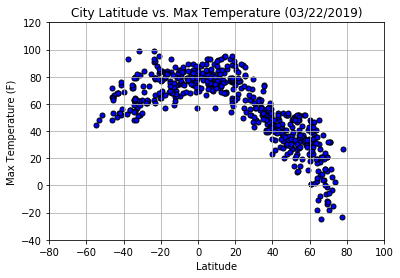

In [26]:
#Obtain x and y coordinates
xvalue = cities_data_df["Lat"]
#x_axis = np.arange(len(xvalue))

yvalue = cities_data_df["Max Temp"]
#y_axis = np.arange(len(yvalue))


#Create a scatter plot
plt.scatter(xvalue, yvalue, c="blue", edgecolors = "black", marker="o", s=25)

#incorporate graph properties
plt.title("City Latitude vs. Max Temperature (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-40,120)

# Save Figure
plt.savefig("../Homework6/CityLatvsMaxTemp.png")
 # Show Figure
plt.show()


#### Latitude vs. Humidity Plot

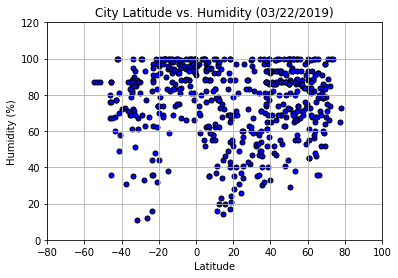

In [27]:
#Obtain x and y coordinates
xvalue = cities_data_df["Lat"]

yvalue = cities_data_df["Humidity"]

#Create a scatter plot
plt.scatter(xvalue, yvalue, c="blue", edgecolors = "black", marker="o", s=25)

#incorporate graph properties
plt.title("City Latitude vs. Humidity (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(0,120)

# Save Figure
plt.savefig("../Homework6/CityLatvsHumidity.png")

#Show Figure
plt.show()


#### Latitude vs. Cloudiness Plot

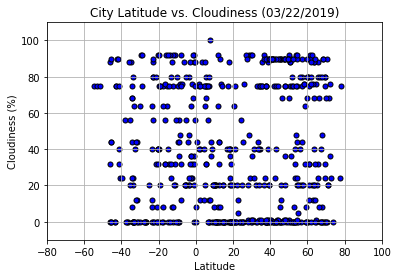

In [31]:
#Obtain x and y coordinates
xvalue = cities_data_df["Lat"]

yvalue = cities_data_df["Cloudiness"]

#Create a scatter plot
plt.scatter(xvalue, yvalue, c="blue", edgecolors = "black", marker="o", s=25)

#incorporate graph properties
plt.title("City Latitude vs. Cloudiness (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-10,110)

# Save Figure
plt.savefig("../Homework6/CityLatvsCloudiness.png")

#Show Figure
plt.show()

#### Latitude vs. Wind Speed Plot

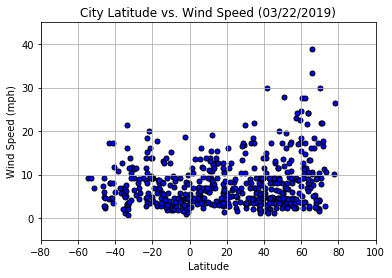

In [29]:
#Obtain x and y coordinates
xvalue = cities_data_df["Lat"]

yvalue = cities_data_df["Wind Speed"]

#Create a scatter plot
plt.scatter(xvalue, yvalue, c="blue", edgecolors = "black", marker="o", s=25)

#incorporate graph properties
plt.title("City Latitude vs. Wind Speed (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-5,45)

# Save Figure
plt.savefig("../Homework6/CityLatvsWindspeed.png")

#Show Figure
plt.show()